## Zadanie 1 - kNN - własna implementacja


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

import pandas as pd


In [2]:
def calculate_dist(record, set_of_records):
  records_cloned = [record] * len(set_of_records)
  result = map(lambda a, b:distance.euclidean(a, b), records_cloned, set_of_records)
  return list(result)



In [3]:
def _knn_per_record(k, test_record, X_true, y_true):
  df = pd.DataFrame(X_true)
  df['label'] = y_true
  df['distance'] = calculate_dist(test_record, X_true)
  df.sort_values(['distance'], ascending=True, inplace=True)

  df_k_nearest = df[:k]

  label_frequency =  df_k_nearest['label'].value_counts(sort=True)
  
  if len(label_frequency.where(label_frequency == max(label_frequency)).dropna()) >1: 
     # if many labels are the most feequent take k+1 nearest values under consideration 
     if k+1 < len(X_true)/2 :
       # stop condition
        predicted_class = _knn_per_record(k+1, test_record, X_true, y_true)
     else:
       predicted_class = list(label_frequency.index)[0]          
  else:
    # take the most frequest label for the nearest points
    predicted_class = list(label_frequency.index)[0]   

  return predicted_class

In [4]:
def knn_predict (X, X_true, y_true, k=5):
  y_predicted = []

  for x_record in X:
    y_predicted.append(_knn_per_record(k, x_record, X_true, y_true))
  
  return y_predicted

In [5]:
iris = datasets.load_iris()
 
#Podziel zbiór na uczący i testowy, test_size - procentowy udział (przykład 50 % uczący i testowy)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.5)
 
#Przykład użycia odległości euklidesowej
a = (1, 2, 3)
b = (4, 5, 6)
dst = distance.euclidean(a, b)
 
# Use KNN to test values
predictions = knn_predict(features_test, features_train, labels_train, k=5)

# # Sprawdzanie skuteczności klasyfikatora
output = accuracy_score(labels_test, predictions)
print(output)

0.96


## Zad2. kNN - Python (sklearn)

In [6]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [7]:
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.3)


In [8]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(features_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
knn.predict(features_test[:10])

array([1, 1, 2, 0, 1, 0, 2, 1, 1, 0])

In [10]:
labels_predicted = knn.predict(features_test)

knn_scikit_output = accuracy_score(labels_test, labels_predicted)
print(f"Accuracy : {knn_scikit_output}")

Accuracy : 0.9555555555555556


## Zadanie 3

In [11]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
clf.predict(iris.data[:1, :])


array([0])

In [13]:
clf.predict_proba(iris.data[:1, :])


array([[1., 0., 0.]])

In [14]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [15]:
graph[0].write_png("iris.png")

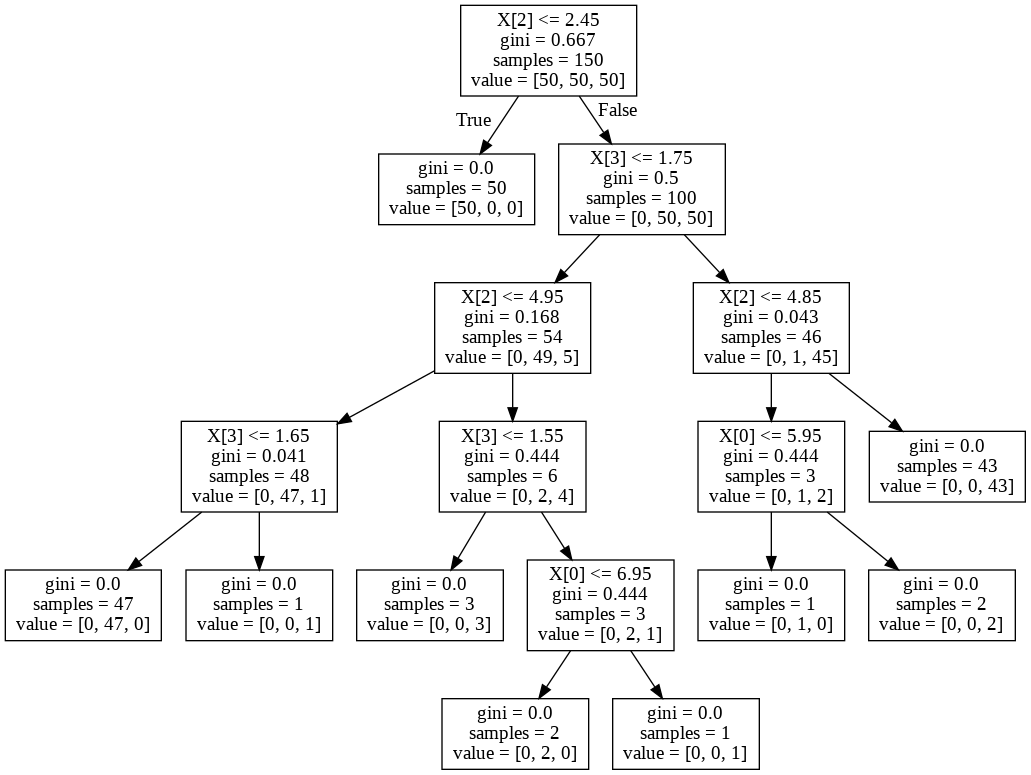

In [16]:
from IPython.display import Image
Image(filename='iris.png') 

## Ex. 4. MNIST 

In [17]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [18]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
 
 
 
# wczytywanie danych
dane = loadmat('mnist.mat')
 
#Zad 1. Podziel dane na parametry X oraz odpowiedź y:
 
X = dane['X']
y = dane['y']
 
# Standaryzacja
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Zamiana cyfry 10 -> 0 (błąd w zbiorze danych)    
y[np.where(y==10)]=0
 
# wysokość i szerokość obrazka z cyfrą 
h = 20
w = 20
 
# # Zad 2. Proszę wyświetlić liczbę cyfr oraz liczbę pikseli przypadającą na jeden obraz
# 
print("Number of piksel per one image: ", X[0].shape)
 

Number of piksel per one image:  (400,)


In [19]:
X[:10].shape

(10, 400)

### Zad 3. Proszę wyświetlić przykładowe cyfry ze zbioru danych (funkcja plot_mnist).

In [46]:
unique_labels = list(np.unique(y))
unique_numbers_X = []
for label in unique_labels:
  idx = list(y).index(label)
  unique_numbers_X.append(X[idx])
print(np.array(unique_numbers_X).shape)

(10, 400)


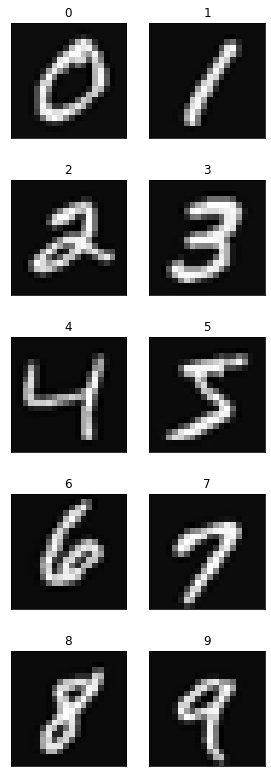

In [47]:
plot_mnist(unique_numbers_X, unique_labels, h, w, n_row=5, n_col=2)

### Zad 4. Proszę podzielić zbiór danych na uczący (70 %) i treningowy..

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3500, 400), (3500, 1), (1500, 400), (1500, 1))


### Zad 5. Proszę stworzyć instancję klasyfikatora, następnie uczenie oraz predykcja dla danych testowych.
Parametry drzewa:DEPTH = 10

In [24]:
DEPTH = 10

In [25]:
tree_classifier = tree.DecisionTreeClassifier(max_depth=DEPTH)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
y_predicted = tree_classifier.predict(X_test)

In [27]:
y_predicted

array([6, 2, 9, ..., 6, 8, 1], dtype=uint8)



### Zad 6. Proszę przedstawić wynik F1, macierz błędów (confusion matrix) oraz raport klasyfikacji.

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, f1_score, multilabel_confusion_matrix

#### Accuracy and F1 score

In [29]:
accuracy  = accuracy_score(y_test, y_predicted)
f1_w  = f1_score(y_test, y_predicted, average='weighted')
f1_micro  = f1_score(y_test, y_predicted, average='micro')
f1_macro  = f1_score(y_test, y_predicted, average='macro')

print(f"accuracy: \t\t {accuracy}")
print(f"f1_score (weighted): \t {f1_w}")
print(f"f1_score (micro): \t {f1_micro}")
print(f"f1_score (micro): \t {f1_macro}")

accuracy: 		 0.7913333333333333
f1_score (weighted): 	 0.7921207418542199
f1_score (micro): 	 0.7913333333333333
f1_score (micro): 	 0.7929517134285684


In [30]:
f1  = f1_score(y_test, y_predicted, average='weighted')
print(f1)

0.7921207418542199


#### Confusion Matrix

In [31]:
labels=list(np.unique(y))
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [32]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predicted)

In [33]:
pd.DataFrame(conf_matrix, columns = labels, index = labels)

,0,1,2,3,4,5,6,7,8,9
0,119,0,1,0,0,2,1,0,5,0
1,0,139,4,6,1,2,1,2,4,1
2,3,5,116,10,3,1,11,4,5,3
3,1,0,7,100,3,11,3,3,7,7
4,1,4,2,3,114,4,3,2,3,9
5,2,0,6,12,1,120,2,5,7,4
6,5,1,1,3,3,8,127,0,7,4
7,0,2,3,2,1,2,0,118,2,13
8,0,1,7,7,3,5,5,1,105,5
9,3,0,0,7,2,3,1,10,9,129


Plot the confusion matrix

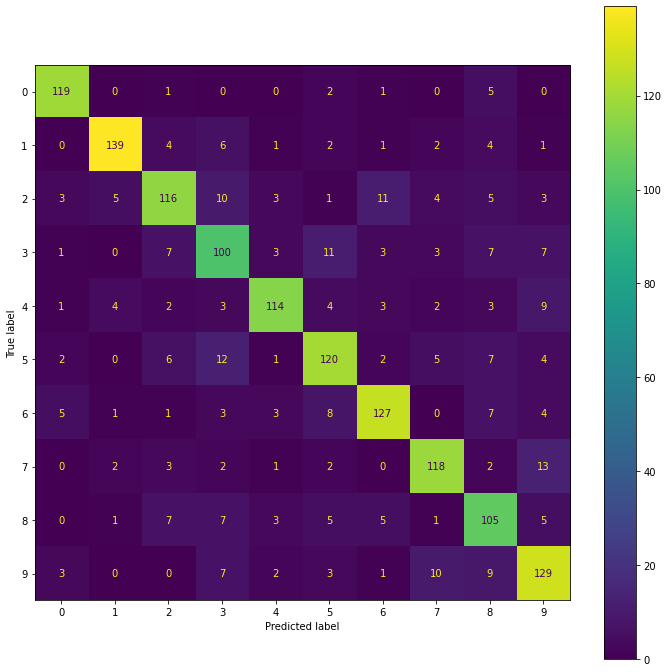

In [34]:
fig, ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(tree_classifier, X_test, y_test, labels=labels,values_format= 'd', ax = ax )
plt.show()

### Classification raport: precision, recall, f1-score

In [35]:
print(classification_report(y_true=y_test, y_pred = y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       128
           1       0.91      0.87      0.89       160
           2       0.79      0.72      0.75       161
           3       0.67      0.70      0.68       142
           4       0.87      0.79      0.83       145
           5       0.76      0.75      0.76       159
           6       0.82      0.80      0.81       159
           7       0.81      0.83      0.82       143
           8       0.68      0.76      0.72       139
           9       0.74      0.79      0.76       164

    accuracy                           0.79      1500
   macro avg       0.79      0.79      0.79      1500
weighted avg       0.79      0.79      0.79      1500

